# Correlations

An essential task in data analyses or data science is to find __correlations__ between different variables or observables

Such correlations can be obvious to the naked eye, or they may need very careful analysis

Let's look at some examples

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("data_HW1.txt",delim_whitespace=True)

In [213]:
data

x      y   x.1   y.1   x.2    y.2   x.3    y.3
0   10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
1    8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
2   13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
3    9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
4   11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
5   14.0   9.96  14.0  8.10  14.0   8.84   8.0   7.04
6    6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
7    4.0   4.26   4.0  3.10   4.0   5.39  19.0  12.50
8   12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
9    7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
10   5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89

In [214]:
x0 = data["x"]
y0 = data["y"]
x1 = data["x.1"]
y1 = data["y.1"]
x2 = data["x.2"]
y2 = data["y.2"]
x3 = data["x.3"]
y3 = data["y.3"]
print("Mean and standard deviation for each column:")
print(f"x0: {x0.mean()},{x0.std():.2f}, y0: {y0.mean():.2f},{y0.std():.2f}")
print(f"x1: {x1.mean()},{x1.std():.2f}, y1: {y1.mean():.2f},{y1.std():.2f}")
print(f"x2: {x2.mean()},{x2.std():.2f}, y1: {y2.mean():.2f},{y2.std():.2f}")
print(f"x3: {x3.mean()},{x3.std():.2f}, y1: {y3.mean():.2f},{y3.std():.2f}")

Mean and standard deviation for each column:
x0: 9.0,3.32, y0: 7.50,2.03
x1: 9.0,3.32, y1: 7.50,2.03
x2: 9.0,3.32, y1: 7.50,2.03
x3: 9.0,3.32, y1: 7.50,2.03


Does that mean we're looking at the same data in each pair of columns?

<AxesSubplot:xlabel='x.3', ylabel='y.3'>

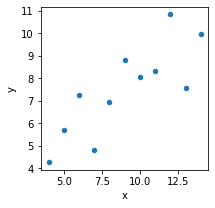

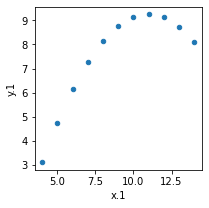

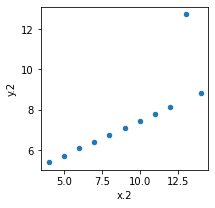

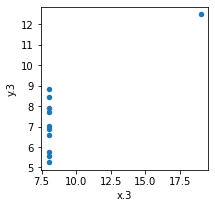

In [215]:
data.plot.scatter("x","y",figsize=(3, 3))
data.plot.scatter("x.1","y.1",figsize=(3, 3))
data.plot.scatter("x.2","y.2",figsize=(3, 3))
data.plot.scatter("x.3","y.3",figsize=(3, 3))

Looking at x vs y, we would say that these points are __linearly__ correlated. The points scatter around the linear dependence, meaning the correlation is not very strong

<AxesSubplot:xlabel='x', ylabel='y'>

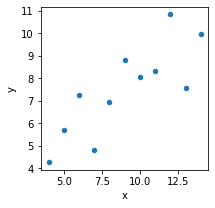

In [216]:
data.plot.scatter("x","y",figsize=(3, 3))

We can characterize the strength of the correlation using a correlation coefficients

In [217]:
# Calculate the correlation coefficient between two columns
data["x"].corr(data["y"],method="pearson")

0.81642051634484

There are three different definitions of the correlation coefficient available: Pearson, Spearman and Kendall

In [218]:
kp = data["x"].corr(data["y"],method="pearson")
ks = data["x"].corr(data["y"],method="spearman")
kk = data["x"].corr(data["y"],method="kendall")
      
print(f"Pearson: {kp}")
print(f"Spearman: {ks}")
print(f"Kendall: {kk}")

Pearson: 0.81642051634484
Spearman: 0.8181818181818182
Kendall: 0.6363636363636364


The Pearson correlation coefficient is probably the most common and can also be calculated using the numpy.corrcoef() method. It is defined as 
<img src="pearson.png">

The second parameter is the __probability__ that the underlying distribution is uncorrelated and normal



Pearson correlation coefficient is 1.0
Probability that x,y are uncorrelated is 0.0


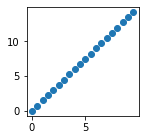

In [219]:
import scipy as sp

x = np.arange(0,10,0.5)
y = x*1.5

plt.figure(figsize = (2,2))
plt.scatter(x,y)

r,p = sp.stats.pearsonr(x,y)
print(f"Pearson correlation coefficient is {r}")
print(f"Probability that x,y are uncorrelated is {p}")

What if we add some noise to the data?

Pearson correlation coefficient is 0.723
Probability that x,y are uncorrelated is 0.000


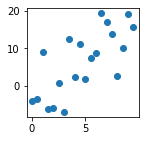

In [220]:
noise = np.random.normal(0,5,len(y))
y_noisy = y + noise
plt.figure(figsize = (2,2))
plt.scatter(x,y_noisy)
r,p = sp.stats.pearsonr(x,y_noisy)
print(f"Pearson correlation coefficient is {r:.3f}")
print(f"Probability that x,y are uncorrelated is {p:.3f}")

What is we take two distributions that are not correlated at all?

The second parameter is the probability that the underlying distribution is uncorrelated and normal

Pearson correlation coefficient is -0.225
Probability that x,y are uncorrelated is 0.117


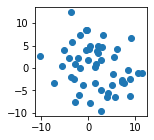

In [221]:
x = np.random.normal(0,5,50)
y = np.random.normal(0,5,50)

plt.figure(figsize = (2,2))
plt.scatter(x,y)
r,p = sp.stats.pearsonr(x,y)
print(f"Pearson correlation coefficient is {r:.3f}")
print(f"Probability that x,y are uncorrelated is {p:.3f}")

The correlation coefficient can also be negative

In [223]:
import scipy as sp

x = np.arange(0,10,0.5)
y = -x*1.5

plt.figure(figsize = (2,2))
plt.scatter(x,y)

r,p = sp.stats.pearsonr(x,y)
print(f"Pearson correlation coefficient is {r}")
print(f"Probability that x,y are uncorrelated is {p}")

Pearson correlation coefficient is -1.0
Probability that x,y are uncorrelated is 0.0


Looking back at the data in the pandas dataframe


Pearson: 0.816


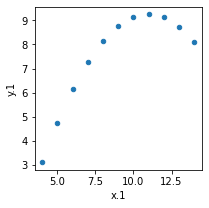

In [224]:
data.plot.scatter("x.1","y.1",figsize=(3, 3))
kp = data["x"].corr(data["y"],method="pearson")

      
print(f"Pearson: {kp:.3f}")

Even though the data follow a smooth curve without noise, r < 1
Pearson coefficient measures __linear__ correlation

Pearson: 0.816


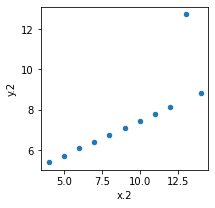

In [225]:
data.plot.scatter("x.2","y.2",figsize=(3, 3))
kp = data["x"].corr(data["y"],method="pearson")

      
print(f"Pearson: {kp:.3f}")

Correlation coefficient is sensitive to outliers.

Another important tool to study correlations are __correlation functions__

If you have data X(s) and Y(T) then the correlation function C(s,t) = corr(X,Y) can be defined for different correlators. Examples are shown in this graph from Wikipedia:

<img src="CorrelationFunctions.png">

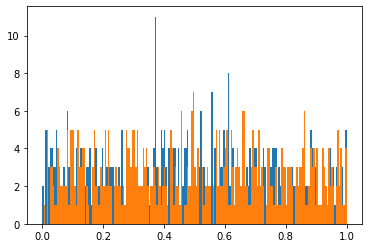

In [226]:
# look at the correlation function for two timeseries of events
# could for example be the signals seen in the cosmicwatch detectors


x1 = np.random.rand(500)
x2 = np.random.rand(500)


count, edges, j = plt.hist(x1,bins=200,range=[0,1])
count, edges, j = plt.hist(x2,bins=200,range=[0,1])

Pearson correlation coefficient is -0.04175303563858346


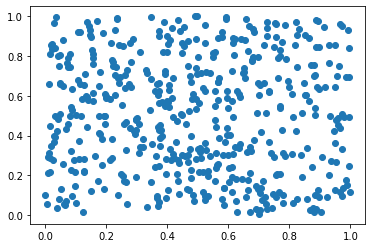

In [227]:
# We can check x1, x2 for correlation:
plt.scatter(x1,x2)
r,p = sp.stats.pearsonr(x1,x2)
print(f"Pearson correlation coefficient is {r}")

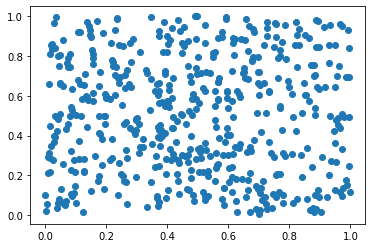

In [228]:
# But what if we add some correlated signal to the noise?
sig1 = np.random.rand(20)
sig2 = sig1+0.02
x1a = np.append(x1,sig1)
x2a = np.append(x2,sig2)
plt.scatter(x1a,x2a)

In [229]:
r,p = sp.stats.pearsonr(x1a,x2a)
print(f"Pearson correlation coefficient is {r}")

Pearson correlation coefficient is -0.0013201143735236086


In [234]:
dx = []
print("Go!")
for i1 in range(len(x1a)):
    for i2 in range(len(x2a)):
        
# Our correlator for this correlation function is just x-y
        d = x1a[i1]-x2a[i2]
        dx.append(d)
print("Done!")

Go!
Done!


In [236]:
counts, edges, jj = plt.hist(dx,bins=200)

In [237]:
#let's add some errorbars

y_err = np.sqrt(counts)
plt.errorbar(edges[0:-1],counts,yerr=y_err,fmt="o")

<ErrorbarContainer object of 3 artists>

Text(0, 0.5, 'Entries per bin')

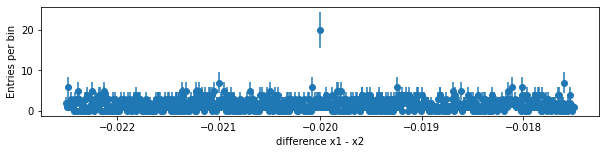

In [249]:
#hm, but what if we zoom in?
fig = plt.figure(figsize = (10,2))
counts, edges = np.histogram(dx,bins=800, range=[-0.0225,-0.0175])
y_err = np.sqrt(counts)
plt.errorbar(edges[0:-1],counts,yerr=y_err,fmt="o")
plt.xlabel("difference x1 - x2")
plt.ylabel("Entries per bin")